<a href="https://colab.research.google.com/github/leoWilliam/Arduino/blob/master/Visao_computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile
import shutil

# Instala gdown se ainda não estiver instalado
try:
    import gdown
except ImportError:
    !pip install -q gdown
    import gdown

# ID do arquivo do Google Drive
file_id_1 = "19CmfD_VT_SEGP8wtwXwy6NXTbYpFMDfP" #dataset
file_id_2 = "1W9t7Tcp3Ec1qCycwINkC1v2UufJysJnQ" #imagens
file_id_3 = "1uLAOTvRcuF4WpNqOHMj4YHJWiP85ru7Y" #best.pt

zip_path_1 = "dataset.zip"
zip_path_2 = "imagens.zip"
zip_path_3 = "best.pt"

# Baixa os arquivos
if not os.path.exists(zip_path_1):
    gdown.download(f"https://drive.google.com/uc?id={file_id_1}", zip_path_1, quiet=False)

if not os.path.exists(zip_path_2):
    gdown.download(f"https://drive.google.com/uc?id={file_id_2}", zip_path_2, quiet=False)

if not os.path.exists(zip_path_3):
    gdown.download(f"https://drive.google.com/uc?id={file_id_3}", zip_path_3, quiet=False)

# Extrai o conteúdo
extract_path_1 = "dataset"
if not os.path.exists(extract_path_1):
    with zipfile.ZipFile(zip_path_1, 'r') as zip_ref:
        zip_ref.extractall(extract_path_1)

extract_path_2 = "imagens"
if not os.path.exists(extract_path_2):
    with zipfile.ZipFile(zip_path_2, 'r') as zip_ref:
        zip_ref.extractall(extract_path_2)

# Remove subpasta duplicada, se existir
inner_path = os.path.join(extract_path_1, "dataset")
if os.path.exists(inner_path):
    for item in os.listdir(inner_path):
        src = os.path.join(inner_path, item)
        dst = os.path.join(extract_path_1, item)

        if os.path.exists(dst):
            print(f"Já existe: {dst} — ignorando.")
        else:
            shutil.move(src, dst)
    # Verifica se a pasta interna ficou vazia e remove
    if not os.listdir(inner_path):
        os.rmdir(inner_path)

Downloading...
From: https://drive.google.com/uc?id=19CmfD_VT_SEGP8wtwXwy6NXTbYpFMDfP
To: /content/dataset.zip
100%|██████████| 4.16M/4.16M [00:00<00:00, 250MB/s]


In [ ]:
import os

yaml_path = "falhas.yaml"

# Só cria o arquivo se ele ainda não existir
if not os.path.exists(yaml_path):
    yaml_content = """
train: dataset/images/train
val: dataset/images/val
test: dataset/images/test

nc: 2
names: ['C3', 'D3']
"""
    with open(yaml_path, "w") as f:
        f.write(yaml_content.strip())
    print(f"Arquivo '{yaml_path}' criado com sucesso.")
else:
    print(f"Arquivo '{yaml_path}' já existe. Nenhuma alteração feita.")

Arquivo 'falhas.yaml' criado com sucesso.


In [ ]:
import torch
torch.cuda.is_available(), torch.cuda.get_device_name(0)

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
try:
    from ultralytics import YOLO
except ImportError:
    !pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
model = YOLO('yolov8m.pt')

model.train(
    data='falhas.yaml',
    epochs=50,
    imgsz=224,
    batch=8,
    workers=0,
    cache=False,
    augment=False
)

  Using cached ultralytics-8.3.161-py3-none-any.whl.metadata (37 kB)
  Using cached ultralytics_thop-2.0.14-py3-none-any.whl.metadata (9.4 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.

NameError: name 'YOLO' is not defined


image 1/1 /content/imagens/D5-29.jpg: 224x224 12 D3s, 236.0ms
Speed: 0.7ms preprocess, 236.0ms inference, 1.1ms postprocess per image at shape (1, 3, 224, 224)


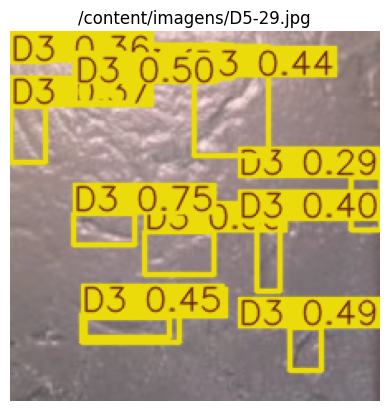


image 1/1 /content/imagens/D5-99.jpg: 224x224 10 D3s, 253.0ms
Speed: 0.8ms preprocess, 253.0ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 224)


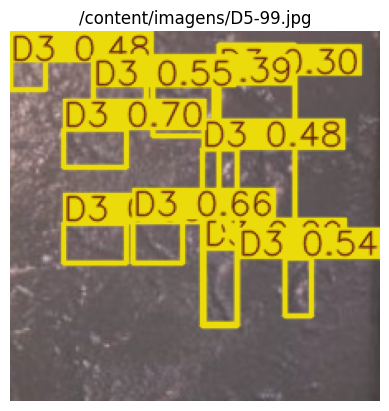


image 1/1 /content/imagens/129.jpg: 224x224 7 C3s, 245.8ms
Speed: 0.7ms preprocess, 245.8ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 224)


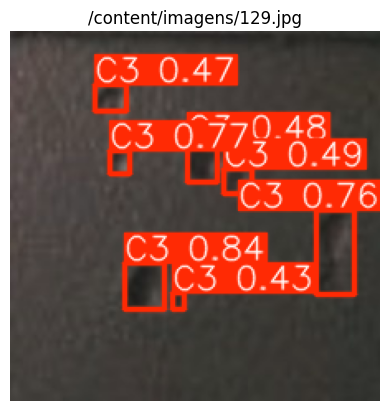


image 1/1 /content/imagens/29.jpg: 224x224 9 C3s, 246.6ms
Speed: 0.8ms preprocess, 246.6ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 224)


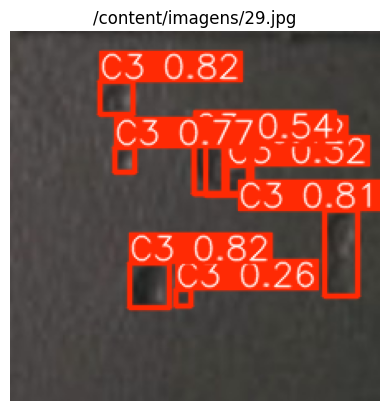


image 1/1 /content/imagens/D5-189.jpg: 224x224 10 D3s, 254.5ms
Speed: 0.7ms preprocess, 254.5ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 224)


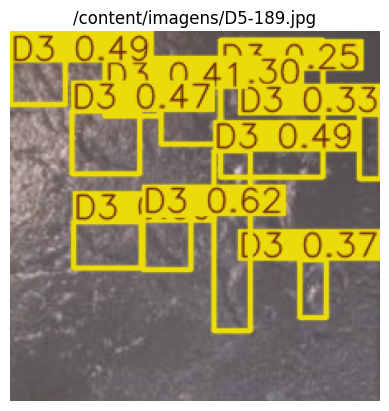


image 1/1 /content/imagens/D5-49.jpg: 224x224 9 D3s, 252.1ms
Speed: 0.8ms preprocess, 252.1ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 224)


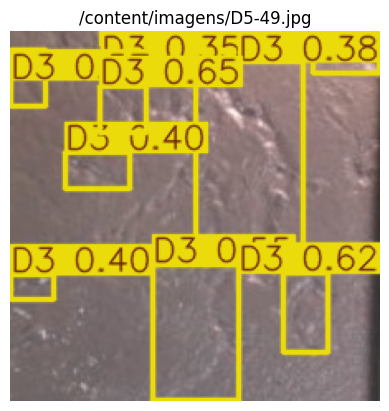


image 1/1 /content/imagens/39.jpg: 224x224 5 C3s, 245.6ms
Speed: 0.8ms preprocess, 245.6ms inference, 1.2ms postprocess per image at shape (1, 3, 224, 224)


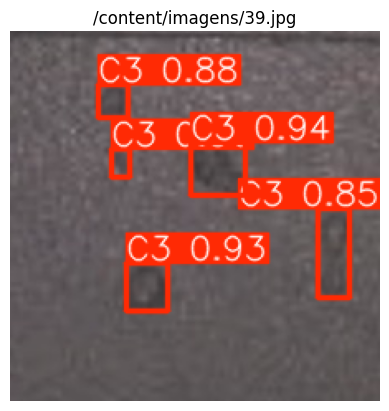


image 1/1 /content/imagens/D5-159.jpg: 224x224 12 D3s, 254.4ms
Speed: 0.7ms preprocess, 254.4ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 224)


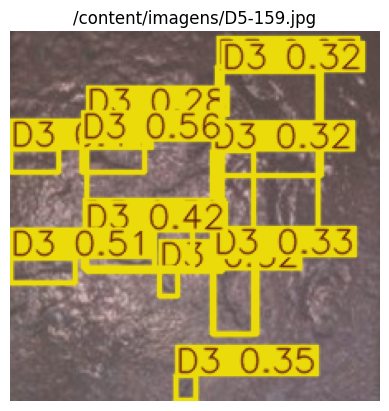


image 1/1 /content/imagens/D5-139.jpg: 224x224 16 D3s, 251.4ms
Speed: 0.7ms preprocess, 251.4ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 224)


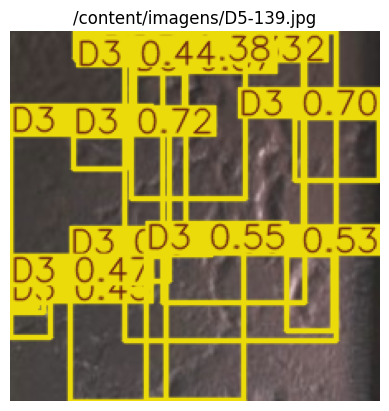


image 1/1 /content/imagens/D5-149.jpg: 224x224 9 D3s, 267.8ms
Speed: 0.8ms preprocess, 267.8ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 224)


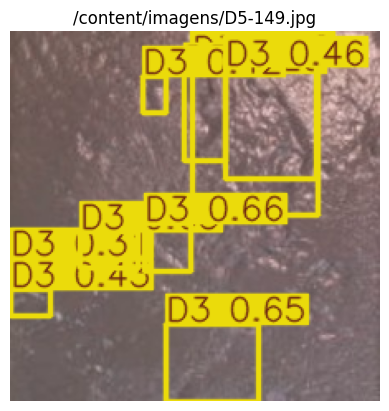


image 1/1 /content/imagens/209.jpg: 224x224 1 C3, 251.5ms
Speed: 0.7ms preprocess, 251.5ms inference, 0.9ms postprocess per image at shape (1, 3, 224, 224)


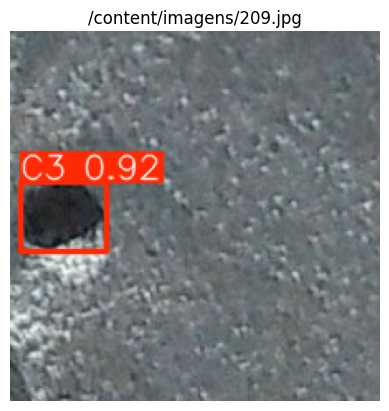


image 1/1 /content/imagens/D5-79.jpg: 224x224 7 D3s, 259.0ms
Speed: 0.7ms preprocess, 259.0ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 224)


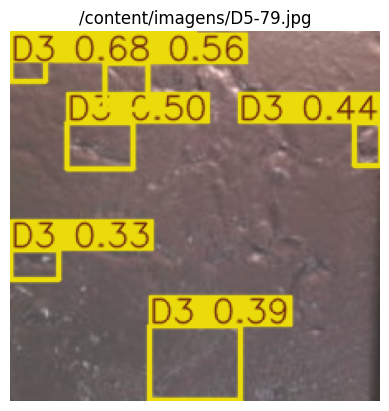


image 1/1 /content/imagens/189.jpg: 224x224 7 C3s, 262.0ms
Speed: 0.7ms preprocess, 262.0ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 224)


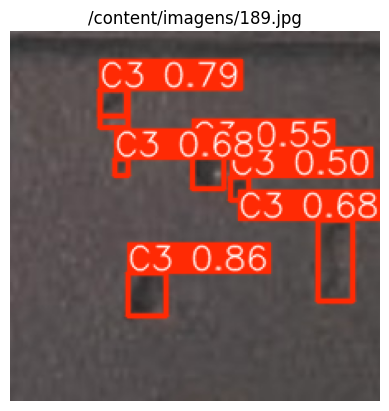


image 1/1 /content/imagens/69.jpg: 224x224 6 C3s, 264.7ms
Speed: 0.7ms preprocess, 264.7ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 224)


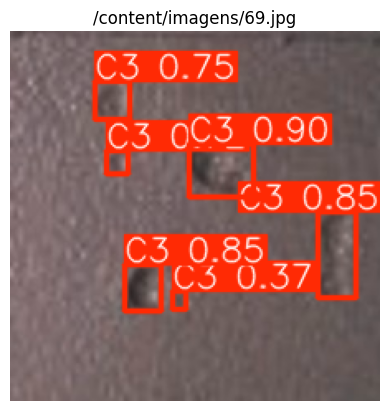


image 1/1 /content/imagens/D5-19.jpg: 224x224 14 D3s, 294.5ms
Speed: 0.8ms preprocess, 294.5ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 224)


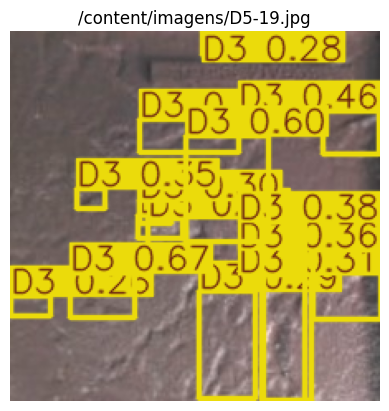


image 1/1 /content/imagens/D5-59.jpg: 224x224 16 D3s, 276.0ms
Speed: 0.7ms preprocess, 276.0ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 224)


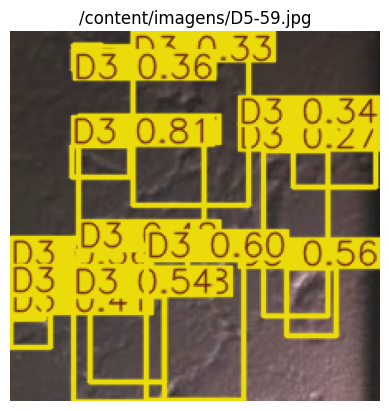


image 1/1 /content/imagens/D5-89.jpg: 224x224 12 D3s, 281.5ms
Speed: 0.7ms preprocess, 281.5ms inference, 1.3ms postprocess per image at shape (1, 3, 224, 224)


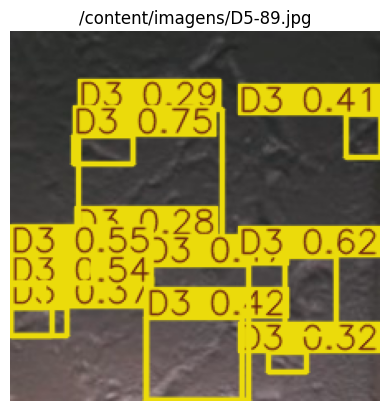


image 1/1 /content/imagens/119.jpg: 224x224 6 C3s, 298.2ms
Speed: 0.8ms preprocess, 298.2ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 224)


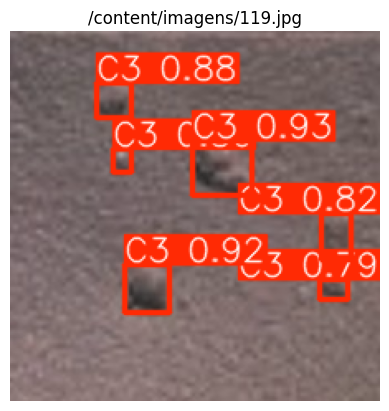


image 1/1 /content/imagens/99.jpg: 224x224 5 C3s, 276.4ms
Speed: 0.8ms preprocess, 276.4ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 224)


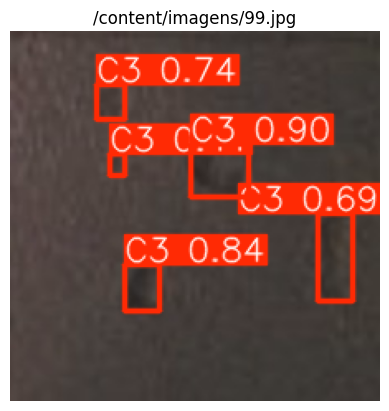


image 1/1 /content/imagens/D5-199.jpg: 224x224 10 D3s, 335.0ms
Speed: 0.7ms preprocess, 335.0ms inference, 4.3ms postprocess per image at shape (1, 3, 224, 224)


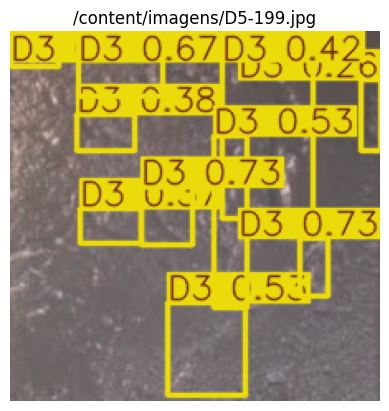


image 1/1 /content/imagens/D5-39.jpg: 224x224 16 D3s, 380.4ms
Speed: 1.2ms preprocess, 380.4ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 224)


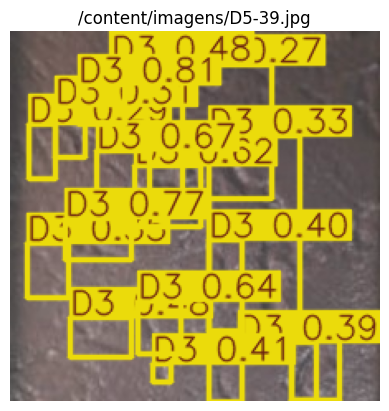


image 1/1 /content/imagens/89.jpg: 224x224 6 C3s, 395.1ms
Speed: 0.7ms preprocess, 395.1ms inference, 1.2ms postprocess per image at shape (1, 3, 224, 224)


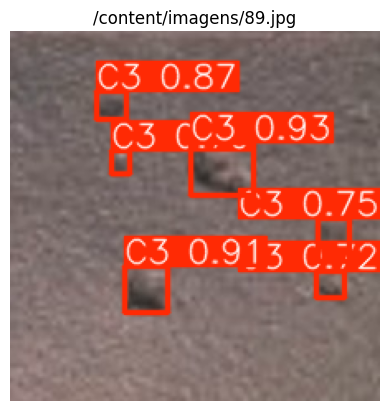


image 1/1 /content/imagens/49.jpg: 224x224 5 C3s, 369.1ms
Speed: 0.8ms preprocess, 369.1ms inference, 1.2ms postprocess per image at shape (1, 3, 224, 224)


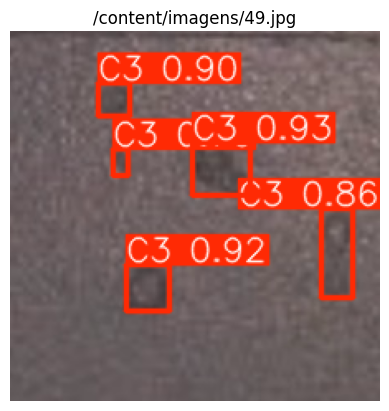


image 1/1 /content/imagens/D5-119.jpg: 224x224 12 D3s, 377.3ms
Speed: 0.7ms preprocess, 377.3ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 224)


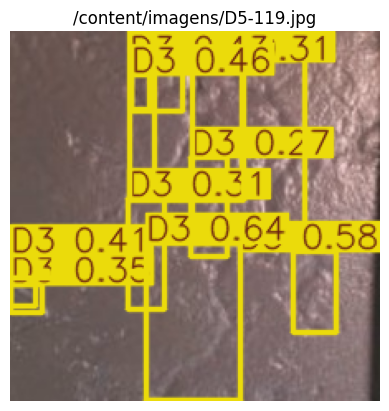


image 1/1 /content/imagens/59.jpg: 224x224 5 C3s, 358.9ms
Speed: 0.8ms preprocess, 358.9ms inference, 1.2ms postprocess per image at shape (1, 3, 224, 224)


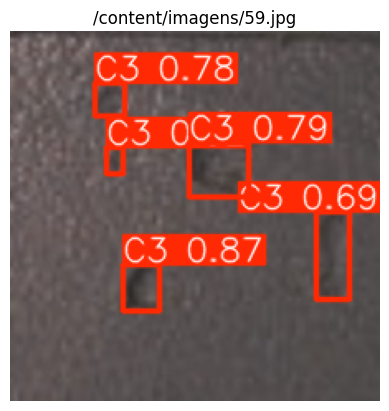


image 1/1 /content/imagens/D5-109.jpg: 224x224 11 D3s, 368.7ms
Speed: 0.7ms preprocess, 368.7ms inference, 1.2ms postprocess per image at shape (1, 3, 224, 224)


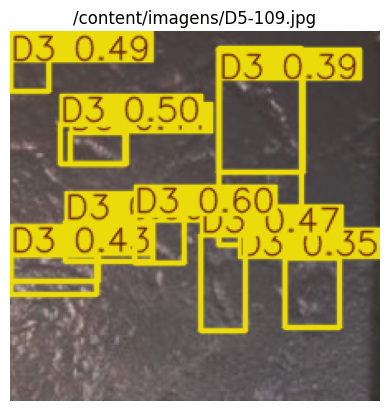


image 1/1 /content/imagens/D5-129.jpg: 224x224 6 D3s, 381.1ms
Speed: 0.8ms preprocess, 381.1ms inference, 1.2ms postprocess per image at shape (1, 3, 224, 224)


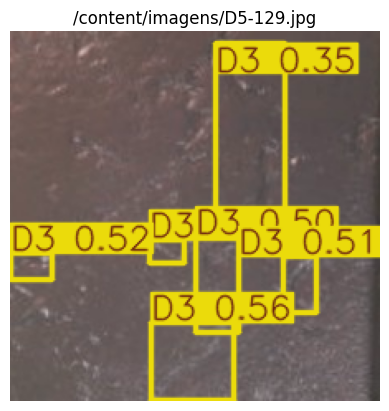


image 1/1 /content/imagens/199.jpg: 224x224 6 C3s, 390.0ms
Speed: 0.7ms preprocess, 390.0ms inference, 1.1ms postprocess per image at shape (1, 3, 224, 224)


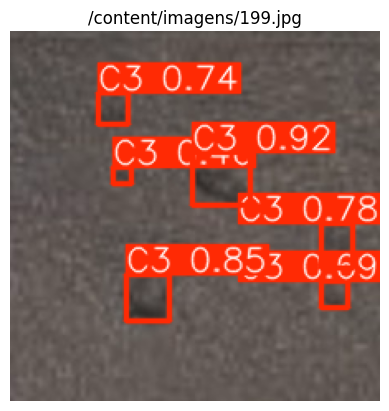


image 1/1 /content/imagens/179.jpg: 224x224 6 C3s, 408.7ms
Speed: 0.7ms preprocess, 408.7ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 224)


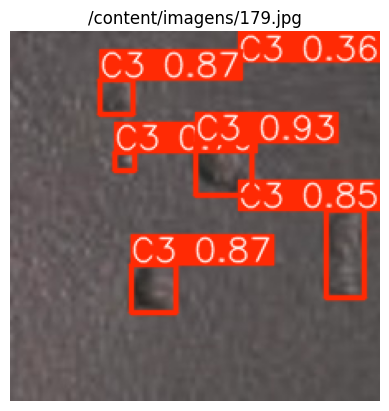


image 1/1 /content/imagens/D5-9.jpg: 224x224 20 D3s, 417.6ms
Speed: 0.7ms preprocess, 417.6ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 224)


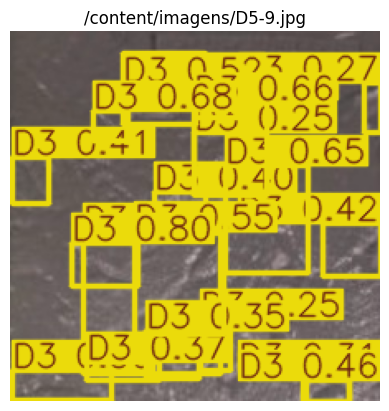


image 1/1 /content/imagens/139.jpg: 224x224 5 C3s, 399.5ms
Speed: 0.7ms preprocess, 399.5ms inference, 1.4ms postprocess per image at shape (1, 3, 224, 224)


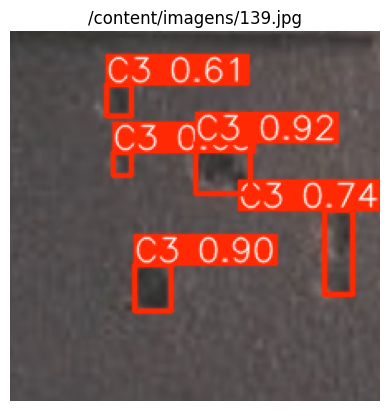


image 1/1 /content/imagens/9.jpg: 224x224 6 C3s, 331.2ms
Speed: 0.8ms preprocess, 331.2ms inference, 0.9ms postprocess per image at shape (1, 3, 224, 224)


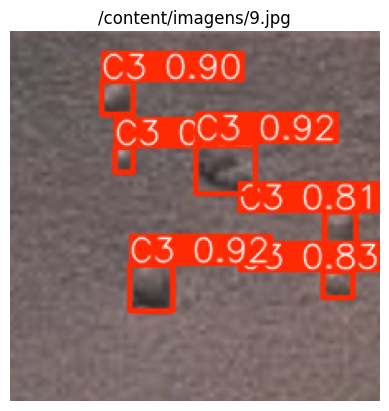


image 1/1 /content/imagens/D5-69.jpg: 224x224 11 D3s, 311.6ms
Speed: 0.7ms preprocess, 311.6ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 224)


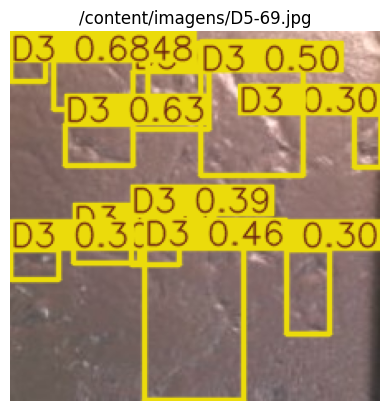


image 1/1 /content/imagens/79.jpg: 224x224 7 C3s, 305.8ms
Speed: 0.7ms preprocess, 305.8ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 224)


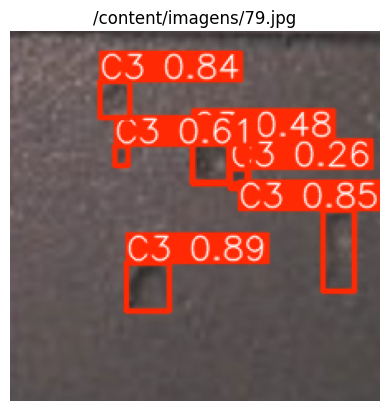


image 1/1 /content/imagens/109.jpg: 224x224 6 C3s, 308.3ms
Speed: 0.7ms preprocess, 308.3ms inference, 2.5ms postprocess per image at shape (1, 3, 224, 224)


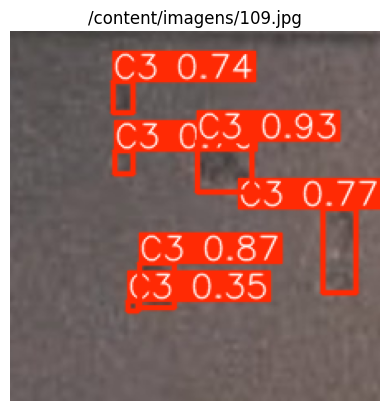


image 1/1 /content/imagens/159.jpg: 224x224 5 C3s, 295.8ms
Speed: 0.7ms preprocess, 295.8ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 224)


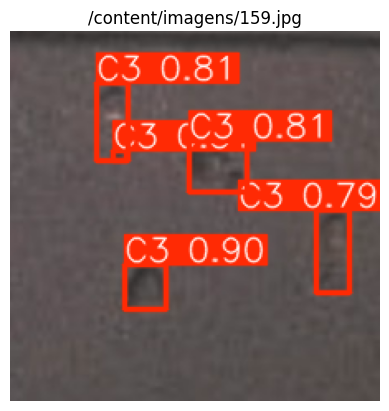


image 1/1 /content/imagens/D5-179.jpg: 224x224 8 D3s, 295.2ms
Speed: 0.8ms preprocess, 295.2ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 224)


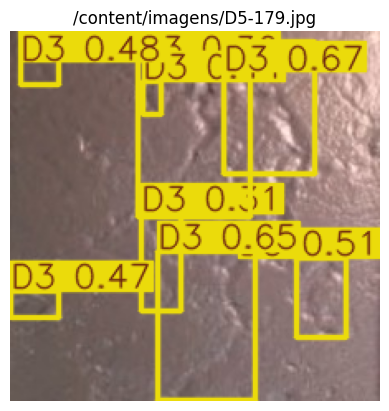


image 1/1 /content/imagens/149.jpg: 224x224 5 C3s, 325.3ms
Speed: 0.8ms preprocess, 325.3ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 224)


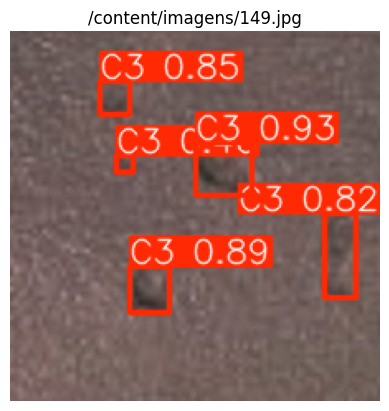


image 1/1 /content/imagens/169.jpg: 224x224 5 C3s, 310.1ms
Speed: 0.8ms preprocess, 310.1ms inference, 1.1ms postprocess per image at shape (1, 3, 224, 224)


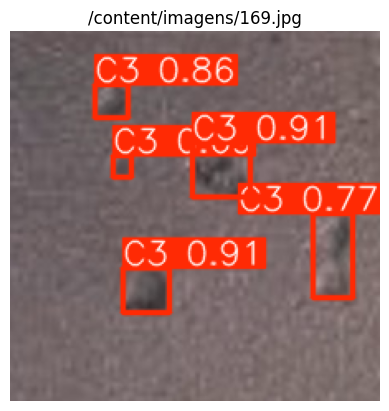


image 1/1 /content/imagens/19.jpg: 224x224 5 C3s, 323.1ms
Speed: 0.8ms preprocess, 323.1ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 224)


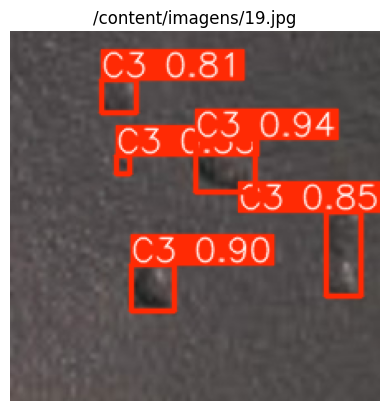

In [16]:
from ultralytics import YOLO
import glob
from PIL import Image
import matplotlib.pyplot as plt

# Carregar modelo
model = YOLO('/content/best.pt')

# Caminho das imagens
image_paths = glob.glob('/content/imagens/*.jpg')  # ou *.png, etc.

# Fazer inferência em cada imagem
for path in image_paths:
    results = model(path)
    res_plotted = results[0].plot()
    plt.imshow(res_plotted)
    plt.title(path)
    plt.axis('off')
    plt.show()